# CSMODEL Machine Project

This Jupyter notebook presents a comprehensive analysis of the [Family Income and Expenditure Survey 2012 Vol. 1](https://psada.psa.gov.ph/auth/register) dataset from the Philippine Statistics Authority (PSA).

The goal of the project is to explore how **socioeconomic and demographic factors** may be associated with the **expenditure patterns** of Filipino households in 2012.

**Research Question**
1. [How are socioeconomic and demographic factors associated with the expenditure patterns of Filipino households in 2012?](#how-are-socioeconomic-and-demographic-factors-associated-with-the-expenditure-patterns-of-filipino-households-in-2012)

**Exploratory Data Analysis (EDA) Questions**
1. [How does the proportion of spending across **major expenditure categories** vary based on various **socioeconomic and demographic factors**?](#1-how-does-the-proportion-of-spending-across-major-expenditure-categories-vary-based-on-various-socioeconomic-and-demographic-factors)
2. [Which regions spend the highest proportion of their **food expenditure** on various **food categories**?](#2-which-regions-spend-the-highest-proportion-of-their-food-expenditure-on-various-food-categories-eg-vegetables-meats)
3. [Is there a correlation between **total household income** and the proportion of food expenditure spent on **food consumed outside the home**?](#3-is-there-a-correlation-between-total-household-income-and-the-proportion-of-food-expenditure-spent-on-food-consumed-outside-the-home)
4. [How does **housing expenditure** differ between **urban** and **rural** households?](#4-how-does-housing-expenditure-differ-between-urban-and-rural-households)
5. [Is there a correlation between **total household income** and **education-related expenditures**?](#5-is-there-a-correlation-between-total-household-income-and-education-related-expenditures)

## Authors

The following students of De La Salle University - Manila, Philippines collaborated on this project:

<table>
  <thead>
    <tr>
      <th>Profile</th>
      <th>Author</th>
      <th>Contributions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="center">
        <img src="https://github.com/qu1r0ra.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Christian Joseph Bunyi</strong>
        <br />
        <a href="https://github.com/qu1r0ra">@qu1r0ra</a>
      </td>
      <td>
        <ul>
          <li>Created and maintained the GitHub repository and the Jupyter notebook</li>
          <li>Constructed the research question</li>
          <li>Constructed EDA questions 1, 2, and 3</li>
          <li>Performed data cleaning and preprocessing (Section II)</li>
          <li>Performed EDA on EDA questions 1, 2, and 3 (Section III)</li>
          <li>Wrote introductory and skeletal Markdown (Introduction, Authors, etc.)</li>
          <li>Wrote Markdown for Sections II and III</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/kelliekaw.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Kellie Kaw</strong>
        <br />
        <a href="https://github.com/kelliekaw">@kelliekaw</a>
      </td>
      <td>
        <ul>
          <li>Constructed EDA question 4</li>
          <li>Wrote structure of the data</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/JohnathanTantanan.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Lance Xavier Lim</strong>
        <br />
        <a href="https://github.com/JohnathanTantanan">@JohnathanTantanan</a>
      </td>
      <td>
        <ul>
          <li>[indicate contributions here]</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/jstnsy.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Justin John Abraham Sy</strong>
        <br />
        <a href="https://github.com/jstnsy">@jstnsy</a>
      </td>
      <td>
        <ul>
          <li>[indicate contributions here]</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

## I. Dataset

```
Note from CJ: Employ a first person, narrative tone--as if we're guiding readers along the notebook.
```

### Description (Justin)

>[write stuff]

### Data collection method (Justin)

>[write stuff]

### Structure (Kellie)

The dataset we are working with is a structured dataset, with each row representing an observation and each column representing an attribute or feature.

The dataset contains **$40171$ observations** with **$119$ attributes**. The attributes are as following:

`W_REGN` indicates the **region** where the household is located.

`W_OID` refers to **other unique IDs**. These are provinces and districts in the Philippines.

`W_SHSN` is the **sample household serial number**, uniquely identifying each sampled household.

`W_HCN` is the **household control number**.

`URB` indicates whether the household is located in an **urban** or **rural** area.

`RSTR` denotes the **stratum** the household belongs to.

`PSU` represents the **PSU number**.

`BWEIGHT` refers to the **base weight**.

`RFACT` refers to the **final weight**.

`FSIZE` refers to the **family size** of the household.

`AGRI_SAL` is the household's **salaries/wages** from **agricultural activity**.

`NONAGRI_SAL` is the household's **salaries/wages** from **non-agricultural activity**.

`WAGES` is the household's **salaries/wages** from both **agricultural** and **non-agricultural activities**.

`NETSHARE` represents the **net share** of **crops, fruits and vegetables produced, fishing or livestock and poultry raised by other households**.

`CASH_ABROAD` represents the household's **cash receipts, supports, etc.** from **abroad**.

`CASH_DOMESTIC` represents the household's **cash receipts, supports, etc.** from **domsetic source**.

`RENTALS_REC` refers to the **rentals received** from non-agricultural land, buildings, spaces, or other properties.

`INTEREST` refers to the amount received, cash or in kind, **interest** from bank deposits and loans extended to other families.

`PENSION` refers to the amount received, cash or in kind, **pension and retirement, workmen's compensation, or social security benefits**.

`DIVIDENDS` refers to the amount received, cash or in kind, **dividend** from investments, such as stock, bonds, etc.

`OTHER_SOURCE` refers to the amount received, cash or in kind, from **other sources of income not elsewhere classified**, such as royalties and income of members below 10 years old.

`NET_RECEIPT` represents the **total net receipts** from family sustenance activity.

`REGFT` represents the total received as **gifts**.

`NET_CFG` refers to the **net income** from **crop farming and gardening**.

`NET_LPR` refers to the **net income** from **livestock and poultry raising**.

`NET_FISH` refers to the **net income** from **fishing**.

`NET_FOR` refers to the **net income** from **forestry and hunting**.

`NET_RET` refers to the **net income** from **wholesale and retail**.

`NET_MFG` refers to the **net income** from **manufacturing**.

`NET_COM` refers to the **net income** from **community, social, recreational, and personal services**.

`NET_TRANS` refers to the **net income** from **transportation, storage, and communication services**.

`NET_MIN` refers to the **net income** from **mining and quarrying**.

`NET_CONS` refers to the **net income** from **construction**.

`NET_NEC` refers to the **net income** from **entrpreneurial activities not elsewhere classified**.

`EAINC` is the **total income** from **entrpreneurial activities**.

`TOINC` is the **total income**.

`LOSSES` represents the **losses** from **entrepreneurial activities**.

`T_BREAD` refers to the **total food expenditure** for **bread and cereals**.

`T_MEAT` refers to the **total food expenditure** for **meat**.

`T_FISH` refers to the **total food expenditure** for **fish and seafood**.

`T_MILK` refers to the **total food expenditure** for **milk, cheese, and eggs**.

`T_OIL` refers to the **total food expenditure** for **oil and fats**.

`T_FRUIT` refers to the **total food expenditure** for **fruits**.

`T_VEG` refers to the **total food expenditure** for **vegetables**.

`T_SUGAR` refers to the **total food expenditure** for **sugar, jam, honey, chocolate, and confectionery**.

`T_FOOD_NEC` refers to the **total food expenditure** for **other food not elsewhere classified**.

`T_COFFEE` refers to the **total food expenditure** for **coffee, cocoa, and tea**.

`T_MINERAL` refers to the **total food expenditure** for **mineral water, soft drinks, fruit juices, and vegetable juices**.

`T_ALCOHOL` refers to the **total food expenditure** for **alcoholic beverages**.

`T_TOBACCO` refers to the **total food expenditure** for **tobacco**.

`T_OTHER_VEG` refers to the **total food expenditure** for **other vegetable-based products**.

`T_FOOD_HOME` refers to the **total food expenditure** for food **consumed at home**.

`T_FOOD_OUTSIDE` refers to the **total food expenditure** for food regularly **consumed outside of home**, i.e., in restaurants, cafes, and canteens.

`T_FOOD` refers to the **total food expenditure**

`T_CLOTH` refers to the **total expenditure** for **clothing and footwear**.

`T_FURNISHING` refers to the **total expenditure** for **furnishings, household equipment, and routine household maintenance**.

`T_HEALTH` refers to the **total expenditure** for **medical products** such as medicines, appliances, and equipment, or any outpatient and inpatient **medical services**.

`T_HOUSING_WATER` refers to the **total expenditure** for **housing, water, electricity, gas, and other fuels**.

`T_ACTRENT` represents the **actual house rent**. It is the actual payment for the house or lot.

`T_RENTVAL` is the house rent or **rental value**.

`T_IMPUTED_RENT` is the **imputed house rental value**

`T_BIMPUTED_RENT` is the **imputed housing benefit rental value**

`T_TRANSPORT` refers to the **total expenditure** for **transportation**. This includes purchase of vehicles, operation, maintenance, and repair of personal transport equipment, and services.

`T_COMMUNICATION` refers to the **total expenditure** for **communication**.

`T_RECREATION` refers to the **total expenditure** for **recreation**. This includes all expenses incurred in acquiring equipment or items.

`T_EDUCATION` refers to the **total expenditure** for **education**. This includes tuition, allowances, and other school fees and contribution.

`T_MISCELLANEOUS` refers to the **total expenditure** for **miscellaneous goods and services** during the past month. This includes salons, barbershops, products for personal hygiene, and beauty products.

`T_OTHER EXPENDITURE` refers to the **total other expenditure**. This includes premiums for insurance, interest payments, losses due to fire or theft, and legal and membership fees.

`T_OTHER_DISIMBURSEMENT` refers to the **total other disimbursements**. This refers to non-family expenditures, including purchase or amortization of real property, payments of cash loan, installments for appliances or personal transport before 2012, loans granted to persons outside the household, amount deposited in banks or investments, and major repair or construction of a house.

`T_NFOOD` refers to the **total non-food expenditure**.

`T_TOTEX` represents the **total expenditure**.

`T_TOTDIS` represents the **total disimbursements**.

`T_OTHREC` refers to the **total other receipts**. These are non-income receipts including the value at cost of real and personal property sold, loands from outside the household, payments for loands granted to others, and withdrawals from savings or business equity. Also included are profits from sale of stocks and bonds, back pay and proceeds from insurance, net winnings from gambling, sweepstakes and lotteries, and inheritance.

`T_TOREC` refers to the **total receipts**.

`FOOD_ACCOM_SRVC` represents the **accomodation services**.

`SEX` is the household head's **sex**.

`AGE` is the household head's **age**.

`MS` is the household head's **marital status**.

`HGC` is the household head's **highest grade completed**.

`JOB` is the household head's **job or business indicator** during the past six months.

`OCCUP` is the household head's **primary occupation** during the past six months.

`KB` is the household head's **kind of business or industry** during the past six months.

`CW` is the household head's **class of worker** during the past six months.

`HHTYPE` represents the **type of household**.

`MEMBERS` is the **number of family members**.

`AGELESS5` is the number of family members **below 5 years old**.

`AGE5_17` is the number of family members **between 5 to 17 years old**.

`EMPLOYED_PAY` is the number of family members **employed for pay** during the past six months.

`EMPLOYED_PROF` is the number of family members **employed for profit** during the past six months.

`SPOUSE_EMP` represents whether the spouse **has a job or business** during the past six months.

`BLDG_TYPE` refers to the **type of building** of the house.

`ROOF` refers to the **type of roof** of the house.

`WALLS` refers to the **type of walls** of the house.

`TENURE` refers to the **tenure status** of the housing unit and lot occupied by the family.

`HSE_ALTERTN` represents whether there were any **alterations or additions** to the house or other **major renovations** done during the past six months

`TOILET` represents the kind of **toilet facilities** used by the family in the house.

`ELECTRIC` represents the **electricity indicator** in the building or house.

`WATER` refers to the **main source of water supply** of the family.

`DISTANCE` is the **distance** of the house **from the water source**.

`RADIO_QTY` refers to the number of **radios**.

`TV_QTY` refers to the number of **TVs**.

`CD_QTY` refers to the number of **CDs / VCDs / DVDs**.

`STEREO_QTY` refers to the number of **component / stero sets**.

`REF_QTY` refers to the number of **refrigerators / freezers**.

`WASH_QTY` refers to the number of **washing machines**.

`AIRCON_QTY` refers to the number of **air conditioners**.

`CAR_QTY` refers to the number of **cars, jeeps, and vans**.

`LANDLINE_QTY` refers to the number of **landline / wireless telephones**.

`CELLPHONE_QTY` refers to the number of **cellular phones**.

`PC_QTY` refers to the number of **personal computers**.

`OVEN_QTY` refers to the number of **stoves with oven / gas range**.

`MOTOR_BANCA_QTY` refers to the number of **motorized boats**.

`MOTORCYCLE_QTY` refers to the number of **motorcycle / tricycles**.

`POP_ADJ` is the **population adjustment**.

`PCINC` represents the **per capita income**.

`NATPC` represents the **national per capita income decile**.

`NATDC` represents the **national income decile**.

`REGDC` represents the **regional income decile**.

`REGPC` represents the **regional per capita income decile**.

## II. Data Cleaning and Preprocessing (Lance and CJ)

Now that we have a good understanding of the dataset and how it was collected, we can proceed with cleaning and preprocessing it.

Cleaning the data is crucial to avoid errors or unexpected results later on, which may result from data that is inconsistent, incorrect, missing, etc.

First, let us import all the Python libraries and modules which we will be using throughout the notebook. Brief descriptions of the purpose of each library/module are indicated as comments.

In [491]:
import matplotlib.pyplot as plt     # brief description of purpose
import numpy as np                  # brief description of purpose
import pandas as pd                 # brief description of purpose
import seaborn as sns               # brief description of purpose

Next, we load the dataset from a `.csv` file. The **pandas** library is ideal for this as it optimized for handling tabular data like that from the survey.

In [492]:
df = pd.read_csv('data/FIES_PUF_2012_Vol_1.csv')

It's good practice to view high level information of a dataset when looking at it the first time. `df.info()` allows us to do so.

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


From `df.info()`, we learn that the dataset indeed contains $40171$ entries or rows or **observations** and $119$ columns or **attributes**.

We also learn that:
- $5$ attributes are of datatype float64
- $92$ attributes are of datatype int64
- $22$ attributes are of datatype object

It also helps looking at some sample observations to see how data is structured and encoded. `df.head()` allows us to do so.

In [494]:
df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


From `df.head()`, we learn that the dataset's attribute names follow some coding scheme which does not clearly convey their meaning. This is not a problem, as we can refer to the **metadata dictionary** provided along with the dataset. Short descriptions of each attribute can also be seen in [Section I](#structure-kellie).

<br>

Next, we will drop unnecessary attributes. This step is dependent on our [research question](#research-question) and [EDA questions](#eda-questions) as they determine which variables are needed and which ones are irrelevant given the scope our EDA.

>**Note:**
>From this point onward, the authors used the [Data Wrangler](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler) extension in Visual Studio Code to make data cleaning easier.

>[dropping columns explanation]

In [495]:
# Drop columns: 'W_OID', 'W_SHSN' and 80 other columns
df = df.drop(columns=['W_OID', 'W_SHSN', 'W_HCN', 'RSTR', 'PSU', 'RFACT', 'BWEIGHT', 'FSIZE', 'AGRI_SAL', 'NONAGRI_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_LPR', 'NET_CFG', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_COM', 'NET_TRANS', 'NET_MIN', 'NET_CONS', 'NET_NEC', 'EAINC', 'LOSSES', 'T_ACTRENT', 'T_RENTVAL', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT', 'T_OTHREC', 'T_TOREC', 'FOOD_ACCOM_SRVC', 'MS', 'OCCUP', 'KB', 'CW', 'HHTYPE', 'MEMBERS', 'AGELESS5', 'AGE5_17', 'EMPLOYED_PAY', 'EMPLOYED_PROF', 'SPOUSE_EMP', 'BLDG_TYPE', 'ROOF', 'WALLS', 'TENURE', 'HSE_ALTERTN', 'TOILET', 'ELECTRIC', 'WATER', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY', 'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY', 'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY', 'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY', 'POP_ADJ', 'PCINC', 'NATPC', 'REGDC', 'REGPC']);

>[converting numerical values to categorical values explanation]

In [496]:

# Change column types
df = df.astype({
    'W_REGN': 'string',
    'URB': 'string',
    'SEX': 'string',
    'NATDC': 'string',
    'JOB': 'string'
})

# Changes in column 'W_REGN'
df.loc[df['W_REGN'].str.lower() == "41".lower(), 'W_REGN'] = "4A"
df.loc[df['W_REGN'].str.lower() == "42".lower(), 'W_REGN'] = "4B"

# Changes in column 'URB'
df.loc[df['URB'].str.lower() == "1".lower(), 'URB'] = "Urban"
df.loc[df['URB'].str.lower() == "2".lower(), 'URB'] = "Rural"

# Changes in column 'SEX'
df.loc[df['SEX'].str.lower() == "1".lower(), 'SEX'] = "Male"
df.loc[df['SEX'].str.lower() == "2".lower(), 'SEX'] = "Female"

# Changes in column 'JOB'
df.loc[df['JOB'].str.lower() == "1".lower(), 'JOB'] = "With Job/Business"
df.loc[df['JOB'].str.lower() == "2".lower(), 'JOB'] = "No Job/Business"

>[dropping duplicate values explanation]

In [497]:
df.duplicated().sum()       # Number of duplicate observations

0

Fortunately, we have no duplicate observations.

>[checking for null values explanation]

In [498]:
num_na_per_attribute = df.isna().sum()
num_na_per_attribute = num_na_per_attribute.sort_values(ascending=False)

print(num_na_per_attribute)

W_REGN                  0
URB                     0
TOINC                   0
T_BREAD                 0
T_MEAT                  0
T_FISH                  0
T_MILK                  0
T_OIL                   0
T_FRUIT                 0
T_VEG                   0
T_SUGAR                 0
T_FOOD_NEC              0
T_COFFEE                0
T_MINERAL               0
T_ALCOHOL               0
T_TOBACCO               0
T_OTHER_VEG             0
T_FOOD_HOME             0
T_FOOD_OUTSIDE          0
T_FOOD                  0
T_CLOTH                 0
T_FURNISHING            0
T_HEALTH                0
T_HOUSING_WATER         0
T_TRANSPORT             0
T_COMMUNICATION         0
T_RECREATION            0
T_EDUCATION             0
T_MISCELLANEOUS         0
T_OTHER_EXPENDITURE     0
T_OTHER_DISBURSEMENT    0
T_NFOOD                 0
T_TOTEX                 0
T_TOTDIS                0
SEX                     0
AGE                     0
HGC                     0
JOB                     0
NATDC       

From this, we learn that the dataset **does not have any missing values**. We can also choose to leave values of 0 for various expenditure categories as it can be the case that the household does not spend any amount for a particular category. We can only trust that the figures provided by each household are accurate to a significant extent and that the values are encoded by PSA without error.

However, to check for *possible* outliers and to satisfy early curiosity, we shall take the liberty to check the distribution of each **atomic** numerical attribute. We won't check aggregate numerical attributes anymore on the assumption that they are summations of a set of atomic numerical attributes.

For this, we can create a **boxplot** for each attribute, as it is a convenient, summarized way of checking how a group of numerical data may be distributed. Moreover, since all attributes of interest fall within the same range [$0$ to $10^9$], we can group them together in the same graph to give us a high-level comparison of the distribution of various atomic expenditure categories.

Lastly, we will need to apply **log transformation** to the values due to their very wide range.

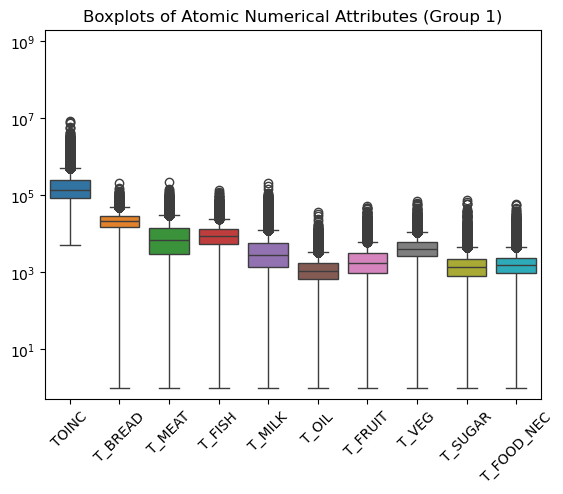

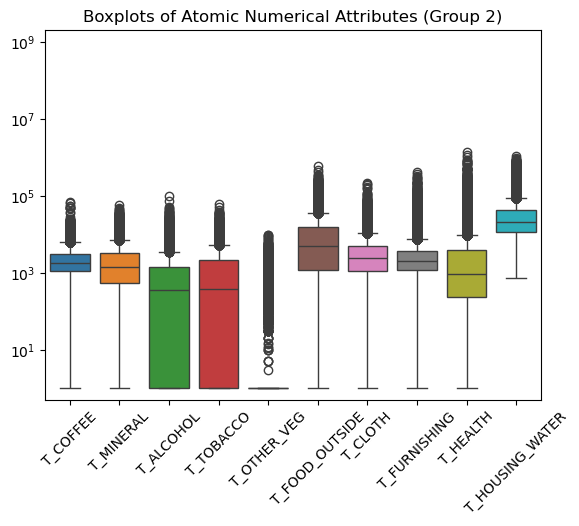

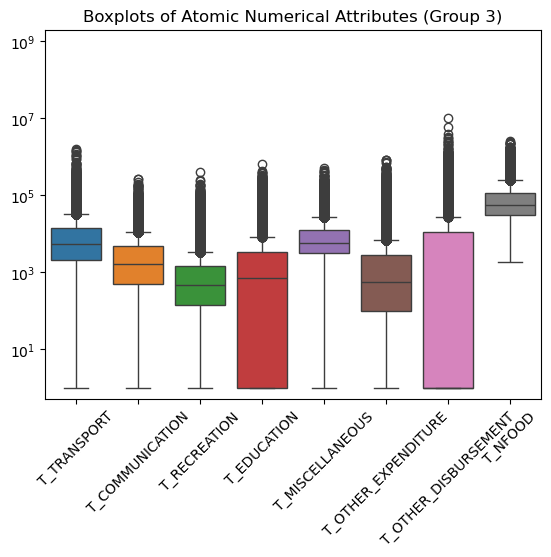

In [499]:
numerical_cols = [      # atomic numerical attributes of interest
    'TOINC', 'T_BREAD', 'T_MEAT', 'T_FISH', 'T_MILK',
    'T_OIL', 'T_FRUIT', 'T_VEG', 'T_SUGAR', 'T_FOOD_NEC',
    'T_COFFEE', 'T_MINERAL', 'T_ALCOHOL', 'T_TOBACCO', 'T_OTHER_VEG',
    'T_FOOD_OUTSIDE', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_HOUSING_WATER',
    'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS',
    'T_OTHER_EXPENDITURE', 'T_OTHER_DISBURSEMENT', 'T_NFOOD'
]

GROUP_SIZE = 10     # number of attributes per plot

for i in range(0, len(numerical_cols), GROUP_SIZE):
    subset = numerical_cols[i:i+GROUP_SIZE]
    df_subset = df[subset].replace(0, 1)    # We replace 0s with 1s since 0 can't be viewed on a log transformation graph

    sns.boxplot(data=df_subset)
    plt.yscale("log")
    plt.ylim(1/2, 1e9 * 2)      # manually set the limit of the y-axis from slightly below 10^0 (or 1) to slightly above 10^9 (encoding limit)
    plt.xticks(rotation=45)
    plt.title(f"Boxplots of Atomic Numerical Attributes (Group {i//GROUP_SIZE + 1})")
    plt.show()



From these charts alone, we can already draw several insights about household expenditures (such as the first thing I noticed that somewhat surprised me, which is that **on average, a household in 2012 *may have* spent the most on the bread and cereals food category**, followed by **fish** then **meat**, both of which didn't even come close and were the food categories I expected instead to come out on top - CJ).

However, we only intend to check for possible outliers, so we shall not analyze any further. At first glance, it appears that there are lots of outliers for each atomic expenditure category, but that does not mean we can simply discard those observations. In fact, there isn't really any obvious 'extreme' outlier, as the outliers for each attribute are pretty spread out, hence the densely blackened areas. This *might* simply be indicative of a **significant disparity** in the higher expenditure amounts for each attribute.

Hence, we will not remove any observations and can reasonably conclude with the data cleaning process.

<br>

Now that we have cleaned the dataset, we can proceed to **preprocessing**, which entails applying necessary transformations (e.g., *feature engineering*, *encoding*, *normalization*, *standardization*) to prepare our data for [**exploratory data analysis (EDA)**](#iii-exploratory-data-analysis-eda).

First, we will do **feature engineering**, which is the creation of new features (or attributes) based on existing ones.

We want to create the ff. attributes which we will use for EDA:

*Computed Attributes*
- **PROP_FOOD_OUTSIDE** = T_FOOD_OUTSIDE / TFOOD
- **T_VICES** = T_ALCOHOL + T_TOBACCO
- **T_HOME** = T_FURNISHING + T_HOUSING_WATER

*Binned Attributes*
- **AGE_GROUP**: age group of the head of the household, binned from AGE (age of the household head)
- **HGC**: binned from HGC (highest grade completed)

<br>

>**Note:**
>Technically, we can choose not to create new features and instead compute for said values on the fly as we need them (as pandas makes it easy to perform vectorized operations, anyways). However, creating new features based on values we may need in the future makes it easier for us long-term and saves time from having to recompute them, especially when they are needed in multiple instances.

In [500]:
# computed attributes
df['PROP_FOOD_OUTSIDE'] = df['T_FOOD_OUTSIDE'] / df['T_FOOD']
df['T_VICES'] = df['T_ALCOHOL'] + df['T_TOBACCO']
df['T_HOME'] = df['T_FURNISHING'] + df['T_HOUSING_WATER']

In [501]:
# binned attributes

### AGE_GROUP ###
age_bins = [0, 29, 39, 49, 59, 120]
age_labels = ['Under 30', '30–39', '40–49', '50–59', '60+']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)


### HGC (overwritten) ###
# The 'HGC - highest grade completed of the head of the family' codes are taken from the metadata dictionary.
def convert_hgc_code_to_string(code):
    exact_matches = {
        0: 'No Grade Completed',
        10: 'Preschool',
        280: 'Elementary Graduate',
        350: 'High School Graduate',
        900: 'Post Baccalaureate'
    }

    if code in exact_matches:
        return exact_matches[code]
    elif 210 <= code <= 260:
        return 'Elementary Undergraduate'
    elif 310 <= code <= 330:
        return 'High School Undergraduate'
    elif 410 <= code <= 420:
        return 'Post Secondary'
    elif 501 <= code <= 589:
        return 'Post Secondary / TechVoc Graduate'
    elif 810 <= code <= 840:
        return 'College Undergraduate'
    elif 601 <= code <= 689:
        return 'College Graduate'
    else:
        return 'N/A'

df['HGC'] = df['HGC'].apply(convert_hgc_code_to_string)

With all these changes, we may want to take another high-level view of our cleaned and preprocessed dataset.

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   W_REGN                40171 non-null  string  
 1   URB                   40171 non-null  string  
 2   TOINC                 40171 non-null  int64   
 3   T_BREAD               40171 non-null  int64   
 4   T_MEAT                40171 non-null  int64   
 5   T_FISH                40171 non-null  int64   
 6   T_MILK                40171 non-null  int64   
 7   T_OIL                 40171 non-null  int64   
 8   T_FRUIT               40171 non-null  int64   
 9   T_VEG                 40171 non-null  int64   
 10  T_SUGAR               40171 non-null  int64   
 11  T_FOOD_NEC            40171 non-null  int64   
 12  T_COFFEE              40171 non-null  int64   
 13  T_MINERAL             40171 non-null  int64   
 14  T_ALCOHOL             40171 non-null  int64   
 15  T_

In [503]:
df.head()

,W_REGN,URB,TOINC,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,...,T_TOTDIS,SEX,AGE,HGC,JOB,NATDC,PROP_FOOD_OUTSIDE,T_VICES,T_HOME,AGE_GROUP
0,14,Rural,325251,30263,29374,5204,3533,2136,2129,6517,...,313269,Female,75,Elementary Graduate,No Job/Business,8,0.204017,0,58726,60+
1,14,Rural,382895,97693,5820,28836,14484,3016,1230,7885,...,246625,Male,48,Elementary Undergraduate,With Job/Business,9,0.048109,2450,28796,40–49
2,14,Rural,173985,14699,13457,7811,1222,1788,2610,5560,...,145966,Male,55,Post Secondary / TechVoc Graduate,No Job/Business,6,0.027450,2070,43721,50–59
3,14,Rural,173303,27846,7787,5106,4112,1713,1530,5435,...,156661,Male,44,College Undergraduate,With Job/Business,6,0.154455,0,55262,40–49
4,14,Rural,187409,29573,11704,8765,4056,1138,1385,4250,...,179855,Male,42,High School Graduate,With Job/Business,6,0.072092,3588,73683,40–49


Looking clean and more readable! We can now proceed with EDA.

## III. Exploratory Data Analysis

>[write stuff]

### Research Question

#### How are socioeconomic and demographic factors associated with the expenditure patterns of Filipino households in 2012?

>[write stuff]

### EDA Questions

>[write stuff]

#### 1. How does the proportion of spending across major expenditure categories vary based on various socioeconomic and demographic factors?

For this EDA question, we will be focusing on the ff. factors:

*Socioeconomic* factors
- National income decile of the household
- Education level of the household head
- Job status of the household head during the past 6 months

*Demographic* factors
- Region of the household
- Age group of the household head
- Sex of the household head

In [504]:
socio_demo_factors = {
    'National Income Decile of the Household'                       : 'NATDC',
    'Education Level of the Household Head'                         : 'HGC',
    'Region of the Household'                                       : 'W_REGN',
    'Age Group of the Household Head'                               : 'AGE_GROUP',
    'Sex of the Household Head'                                     : 'SEX',
    'Household Head Had a Job/Business During the Past Six Months'  : 'JOB'
}

We will be using the ff. major expenditure categories:

| Major Expenditure Category | Attribute Name |
|---|---|
| **Food** | T_FOOD |
| **Vices** | T_VICES (engineered) |
| **Clothing** | T_CLOTH |
| **Health** | T_HEALTH |
| **Home** | T_HOME (engineered) |
| **Transportation** | T_TRANSPORT |
| **Communication** | T_COMMUNICATION |
| **Recreation** | T_RECREATION |
| **Education** | T_EDUCATION |
| **Miscellaneous** | T_MISCELLANEOUS |
| **Other Expenditures** | T_OTHER_EXPENDITURE |
| **Non-Family Expenditures** | T_OTHER_DISBURSEMENT |

In [505]:
major_expenditure_categories = {
    'Food'                      : 'T_FOOD',
    'Vices'                     : 'T_VICES',
    'Clothing'                  : 'T_CLOTH',
    'Health'                    : 'T_HEALTH',
    'Home'                      : 'T_HOME',
    'Transportation'            : 'T_TRANSPORT',
    'Communication'             : 'T_COMMUNICATION',
    'Recreation'                : 'T_RECREATION',
    'Education'                 : 'T_EDUCATION',
    'Miscellaneous'             : 'T_MISCELLANEOUS',
    'Other Expenditures'        : 'T_OTHER_EXPENDITURE',
    'Non-Family Expenditures'   : 'T_OTHER_DISBURSEMENT'
}

First, we want to define a function that generates a **stacked bar chart**, which is great for visually comparing **breakdowns in proportion** across different groups.

In [506]:
def generate_stacked_bar(df, groupby_col, category_dict, reindex=False, title=None, figsize=(10, 6)):
    category_labels = category_dict.keys()
    category_values = category_dict.values()

    df_grouped_summed = df.groupby(groupby_col)[list(category_values)].sum()
    df_grouped_normalized = df_grouped_summed.div(df_grouped_summed.sum(axis=1), axis=0)        # normalize values to proportions

    if isinstance(reindex, list):
        df_grouped_normalized = df_grouped_normalized.reindex(reindex)
    elif reindex:
        df_grouped_normalized = df_grouped_normalized.sort_index()

    ax = df_grouped_normalized.plot(kind="bar", stacked=True, figsize=figsize, colormap="tab20")

    ax.set_title(title or f"Stacked Bar Chart by {groupby_col}")
    ax.set_xlabel(groupby_col)
    ax.set_ylabel("Proportion")
    ax.legend(title="Expenditure Category", labels=category_labels, bbox_to_anchor=(1.05, 1), loc="upper left")
    
    plt.tight_layout()
    plt.show()


Second, we want to define a helper function that generates a **table of numerical summaries** to provide numerical insights to our stacked bar chart.

In [507]:
def generate_summary_table(factor_title, factor_col):
    df_grouped_summed = df.groupby(factor_col)[list(major_expenditure_categories.values())].sum()
    df_grouped_normalized = df_grouped_summed.div(df_grouped_summed.sum(axis=1), axis=0)        # normalize values to proportions

    summary_df = pd.DataFrame()
    
    for category_title, category_col in major_expenditure_categories.items():
        col_vals = df_grouped_normalized[category_col]
        
        summary_df.loc[category_title, 'Mean'] = col_vals.mean()
        summary_df.loc[category_title, 'Std. Dev.'] = col_vals.std()
        summary_df.loc[category_title, 'Group with Min %'] = col_vals.idxmin()
        summary_df.loc[category_title, 'Min %'] = col_vals.min()
        summary_df.loc[category_title, 'Group with Max %'] = col_vals.idxmax()
        summary_df.loc[category_title, 'Max %'] = col_vals.max()
        summary_df.loc[category_title, 'Range'] = col_vals.max() - col_vals.min()

    summary_df = summary_df[
        ['Mean', 'Std. Dev.', 'Group with Min %', 'Min %', 'Group with Max %', 'Max %', 'Range']
    ]

    display(
        summary_df.style
            .set_caption(f"Numerical Summaries of Major Expenditure Categories Across '{factor_title}' Groups")
            .format({
                'Mean': '{:.2%}',
                'Std. Dev.': '{:.2%}',
                'Min %': '{:.2%}',
                'Max %': '{:.2%}',
                'Range': '{:.2%}'
            })
    )

>explanation

Third, we want to define another helper function that generates both a **stacked bar chart** and a **table of numerical summaries** for the n-th factor in the defined `socio_demo_factors` dictionary.

In [508]:
socio_demo_factors_list = list(socio_demo_factors.items())

def generate_stacked_bar_summary_table(n, reindex=False):
    if n >= len(socio_demo_factors):
        raise ValueError(f"Value must be in the range [0, {len(socio_demo_factors)-1}]")
    
    factor_title = socio_demo_factors_list[n][0]
    factor_col = socio_demo_factors_list[n][1]

    # visualization
    generate_stacked_bar(
        df,
        groupby_col=factor_col,
        category_dict=major_expenditure_categories,
        reindex=reindex,
        title=f"Proportional Breakdown of Spending by {factor_title}"
    )

    # numerical summaries
    generate_summary_table(factor_title=factor_title, factor_col=factor_col)

Now that we have defined the necessary functions, we can proceed with generating visualizations and numerical summaries for interpretation.

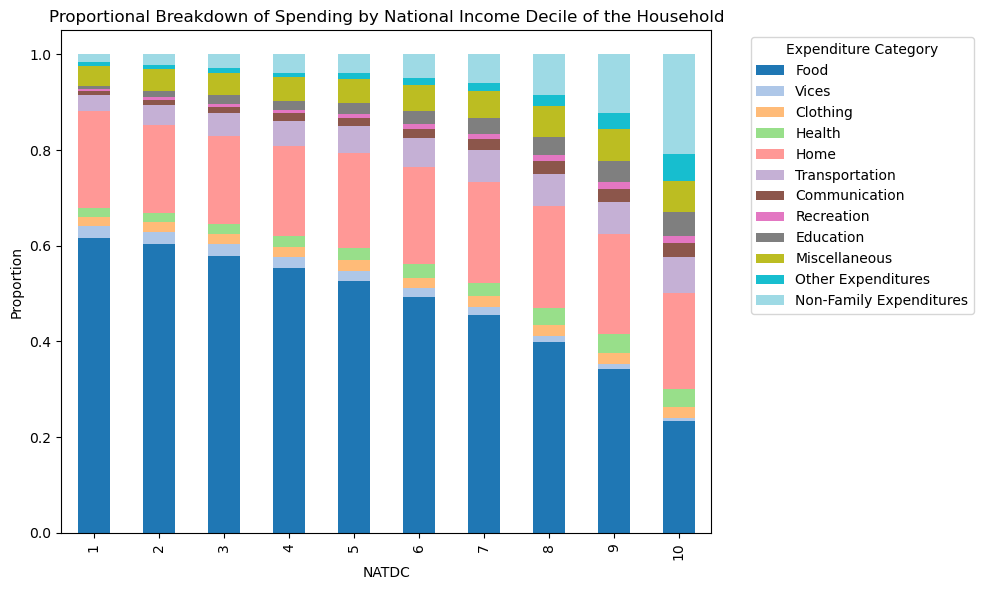

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,48.05%,12.38%,10,23.48%,1,61.68%,38.19%
Vices,1.81%,0.64%,10,0.56%,1,2.47%,1.91%
Clothing,2.17%,0.10%,1,1.94%,9,2.29%,0.36%
Health,2.75%,0.77%,1,1.79%,10,3.89%,2.10%
Home,19.95%,1.09%,2,18.33%,8,21.32%,2.99%
Transportation,5.70%,1.33%,1,3.37%,10,7.61%,4.24%
Communication,1.84%,0.75%,1,0.67%,10,2.83%,2.16%
Recreation,0.95%,0.39%,1,0.45%,10,1.64%,1.19%
Education,2.76%,1.36%,1,0.77%,10,4.94%,4.17%
Miscellaneous,5.38%,0.88%,1,4.11%,9,6.67%,2.56%


In [509]:
natdc_reindex = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

generate_stacked_bar_summary_table(0, reindex=natdc_reindex)

Here, we look into how the proportion of spending across major expenditure categories differ for households across the 10 **national income deciles**.

---

##### Context

First, what is a **decile**? Statistically, a decile is any one of 9 values that **equally divide** a sorted group of data into **10 groups of equal frequency**. In the context of household income, we are interested in the 10 groups formed by these deciles.

We refer to these 10 groups as the **1st to 10th deciles**, with the 1st decile corresponding to the lowest 10% of total incomes and the 10th decile corresponding to the highest 10% of total incomes. Each household can then be assigned a **national income decile** based on which decile their total income falls under.

---

##### Visualization

The chart reveals interesting patterns on how **expenditure proportions** may change the higher the **national income decile** of a household is:

**Categories with Increasing Proportions**
- Health
- Transportation
- Communication
- Recreation
- Education
- Other Expenditures
- Non-Family Expenditures

**Categories with Decreasing Proportions**
- Food
- Vices

**Categories that Roughly Remained the Same**
- Clothing
- Home
- Miscellaneous

In other words, households with a higher national income decile may tend to allot a greater proportion of their expenditures on health, transportation, communication, etc. and less on food and vices.

The proportions of non-family and 'other' expenditures appeared to increase more noticeably in the higher deciles. Similarly, the proportion of food and vice expenditures appeared to decrease more noticeably in the higher deciles.

Interestingly, proportions for expenditure related to clothing, home, and miscellaneous remain almost the same visually.

---

##### Numerical Summaries

Looking at the numbers, we first notice that **most of a household's expenditures end up on food**. In fact, we can say that **the average household spends almost half of its expenditures on food alone**. However, **food expenditure varies greatly**, as visualized by the graph and as quantified by its high standard deviation ($12.38 \%$) and range ($38.19 \%$). The same goes for non-family expenditures with a standard deviation of ($5.92 \%$) and a range of ($19.33 \%$), compared to other categories with much lower standard deviations and ranges.

The next three major expenditure categories with the highest average proportions following food are

- Home                      ($19.95 \%$)
- Non-Family Expenditures   ($6.72 \%$)
- Transportation            ($5.70 \%$)

This provides us insight on what the average household spends the most on for their expenditures.

---

We may also notice that most of the groups that spent the least or most across different categories are from the **extremes** (i.e., 1st, 2nd, 9th 10th deciles). This is very meaningful, as it suggests to us that total income may be significantly related to how a household ends up spending, and thus, may provide us insights on what certain households may spend more on.

For instance, **the group that spends the least proportion on food and vices is the 10th decile (richest 10%), while the 1st decile (poorest 10%) spends the greatest proportion on the same categories**.

Similarly, the 1st decile group spends the least proportion on every other category (except for home, in which it's the 2nd decile), while the 8th to 10th decile (mostly 10th) spend the greatest proportion on those same categories.

All of this may be indicative of how **lower income households may want to prioritize food for survival and vices to help get through life**, leaving them with less money for other expenditure categories. On the other hand, **wealthier households are able to spend more money on other expenditure categories, thus lowering the proportion of other non-growing categories**. Normally, food-related expenditures do not grow that much the more income you have, so its proportion gets lower the more money a household puts into other categories.

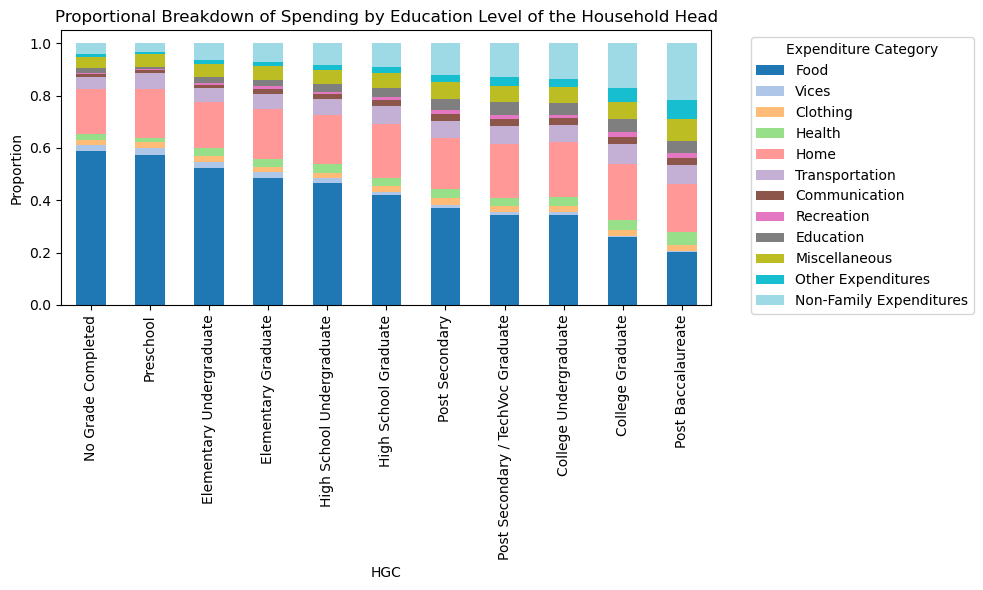

,Mean,Std. Dev.,Group with Min %,Min %,Group with Max %,Max %,Range
Food,41.62%,12.52%,Post Baccalaureate,20.12%,No Grade Completed,58.93%,38.81%
Vices,1.51%,0.78%,Post Baccalaureate,0.36%,Preschool,2.83%,2.47%
Clothing,2.26%,0.17%,No Grade Completed,2.04%,Post Secondary,2.56%,0.51%
Health,3.13%,0.80%,Preschool,1.46%,Post Baccalaureate,4.77%,3.31%
Home,19.45%,1.47%,No Grade Completed,17.18%,College Graduate,21.75%,4.57%
Transportation,6.24%,0.87%,No Grade Completed,4.48%,Post Baccalaureate,7.40%,2.92%
Communication,2.14%,0.66%,No Grade Completed,1.06%,College Graduate,2.90%,1.84%
Recreation,1.16%,0.47%,Preschool,0.42%,Post Baccalaureate,1.91%,1.49%
Education,3.30%,1.44%,Preschool,0.62%,College Graduate,4.99%,4.37%
Miscellaneous,5.88%,1.14%,No Grade Completed,4.15%,Post Baccalaureate,8.44%,4.30%


In [513]:
hgc_reindex = [
    'No Grade Completed',
    'Preschool',
    'Elementary Undergraduate',
    'Elementary Graduate',
    'High School Undergraduate',
    'High School Graduate',
    'Post Secondary',
    'Post Secondary / TechVoc Graduate',
    'College Undergraduate',
    'College Graduate',
    'Post Baccalaureate'
]

generate_stacked_bar_summary_table(1, reindex=hgc_reindex)

>[interpretation]

In [ ]:
w_regn_reindex = ['1', '2', '3', '4A', '4B', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']

generate_stacked_bar_summary_table(2, reindex=w_regn_reindex)

In [ ]:
generate_stacked_bar_summary_table(3)

In [ ]:
generate_stacked_bar_summary_table(4)

In [ ]:
generate_stacked_bar_summary_table(5)

>[interpretation]

#### 2. Which regions spend the highest proportion of their food expenditure on various food categories?

>[write stuff]

#### 3. Is there a correlation between total household income and the proportion of food expenditure spent on food consumed outside the home?

With this EDA question, we want to explore whether higher **total household income** may be related to an increased or decreased **proportion of food expenditure spent on food consumed outside the home**.

First, let us define a function that generates and displays a **scatterplot** for correlation. We can add keyword arguments `log_x` and `log_y` to allow for **log transformation** of values before plotting on the x-axis, y-axis, or both. Note that this **does not modify** the values in the data frame; it only affects how they are plotted.

In [ ]:
def generate_scatter(data, x, y, log_x=False, log_y=False, title=None):
    sns.scatterplot(data=data, x=x, y=y)

    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    plt.title(title or f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)

    plt.tight_layout()
    plt.show()

Let us also define a function that shows a high-level summary of a numeric attribute **visually** (through a boxplot) and **numerically** (through common numerical measures).

In [ ]:
def generate_numeric_col_summary(series, title=None):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=series)
    plt.title(title or f"Boxplot of '{series.name}'")
    plt.xlabel(series.name)
    plt.tight_layout()
    plt.show()
    
    print(f"----- Numerical summaries of column '{series.name}' -----")
    print(f"Mean    : {series.mean():.2f}")
    print(f"Median  : {series.median():.2f}")
    print(f"Std Dev : {series.std():.2f}")

In [ ]:
generate_numeric_col_summary(df['TOINC'])

Since the distribution of **total income** is clearly **right-skewed** (i.e., there are households with very high income), we would need to apply **log transformation** to its values. Moreover, it would be sensible plotting total income on the x-axis since we're interested on seeing how increasing it would impact the other variable.

In [ ]:
df['log_TOINC'] = np.log(df['TOINC'])

generate_scatter(df, 'log_TOINC', 'PROP_FOOD_OUTSIDE')

correlation_value = df['log_TOINC'].corr(df['PROP_FOOD_OUTSIDE'])
print(f"Correlation (r) between log(TOINC) and PROP_FOOD_OUTSIDE = {correlation_value:.2f}")

Unfortunately, we got a scatterplot and a correlation value that are not suggestive of a strong relationship between the two variables.

Results like these are alright, as the primary purpose of EDA is to **explore** *potential* patterns and trends on our data that could prompt us to dive deeper into certain aspects of it. In this case, we just have to explore more possible relationships, which we will do so in the next EDA.

#### 4. Is there a correlation between total household income and any major expenditure category?

>[write stuff]

In [ ]:
for attr in major_expenditure_categories.values():
    generate_scatter(df, 'TOINC', attr, log_x=True, log_y=True)
    
    correlation_value = df['log_TOINC'].corr(df[attr])
    print(f"Correlation (r) between 'TOINC' and '{attr}' = {correlation_value:.2f}")

>[interpretation]

#### 5. How does housing expenditure differ between urban and rural households?

>[write stuff]

## IV. Data Mining

To be continued during phase 2.

<br>

## V. Statistical Inference

To be continued during phase 2.

<br>

## VI. Insights and Conclusions

To be continued during phase 2.

<br>

## Sources and Citations

During the preparation of this work, the authors used [NAME TOOL/SERVICE]
for the following purposes:

- [purposes]

After using this tool, the authors reviewed and edited the content as needed and takes
full responsibility for the content of the publication.